In [29]:
%pylab inline
import pandas as pd
import pyemma.coordinates as coor
import pyemma.msm as msm
import pyemma.plots as mplt
from pyemma.thermo import tram

rc('font', family='serif', size=20)

Populating the interactive namespace from numpy and matplotlib


In [11]:
# save snapshot every 5000 steps
# add bias every 500 steps
# reweight on md.xtc with STRIDE=1 PACE=1

hills = pd.read_csv('HILLS_reweight', sep=r'\s*', header=None, comment='#')
hills.columns = ['time','cm2lig','cm2unlig','sigma_cm2lig','sigma_cm2unlig','height','biasf']
print hills.shape
hills[:3]

(2391, 7)


/home/gerry/gp120/env/lib/python2.7/site-packages/ipykernel_launcher.py:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  This is separate from the ipykernel package so we can avoid doing imports until


,time,cm2lig,cm2unlig,sigma_cm2lig,sigma_cm2unlig,height,biasf
0,1,42.275227,10.585400,1,1,22.222222,10
1,2,42.361825,11.204327,1,1,10.678503,10
2,3,42.368951,13.170031,1,1,20.239805,10


In [18]:
top_un_file = '../strutures/m_3681_4nco.pdb'
top_li_file = '../strutures/m_3681_3j70.pdb'
traj_list = ['/home/gerry/transition/cmap_11_25/pro.xtc']

In [23]:
feat = coor.featurizer(top_un_file)
feat.add_minrmsd_to_ref(top_un_file, ref_frame=0)
feat.add_minrmsd_to_ref(top_li_file, ref_frame=0)
feat.add_backbone_torsions(cossin=True)
print feat.dimension()

1878


In [21]:
inp = coor.source(traj_list, feat)
print('number of trajectories = ',inp.number_of_trajectories())
print('trajectory length = ',inp.trajectory_length(0))
print('trajectory time step = ',500.0 / (inp.trajectory_length(0)-1),'ns')
print('number of dimension = ',inp.dimension())

('number of trajectories = ', 1)
('trajectory length = ', 2392)
('trajectory time step = ', 0.20911752404851527, 'ns')
('number of dimension = ', 1878)


In [45]:
n_clusters = 250
clustering = coor.cluster_kmeans(inp.get_output(),k=n_clusters)

Box(children=(Text(value=u''), IntProgress(value=0)))

Box(children=(Text(value=u''), IntProgress(value=0)))

Box(children=(Text(value=u''), IntProgress(value=0)))

13-02-18 11:41:42 pyemma.coordinates.clustering.kmeans.KmeansClustering[9] INFO     Cluster centers converged after 4 steps.


In [46]:
# dtrajs: index of Markov states
dtrajs = clustering.dtrajs

In [47]:
its = msm.timescales_msm(dtrajs)

Box(children=(Text(value=u''), IntProgress(value=0)))

13-02-18 11:43:06 pyemma.msm.estimators.maximum_likelihood_msm.MaximumLikelihoodMSM[10] WARNING  Ignored error during estimation: Active set is empty. Cannot estimate MSM.
13-02-18 11:43:06 pyemma.msm.estimators.maximum_likelihood_msm.MaximumLikelihoodMSM[11] WARNING  Ignored error during estimation: Active set is empty. Cannot estimate MSM.
13-02-18 11:43:06 pyemma.msm.estimators.maximum_likelihood_msm.MaximumLikelihoodMSM[12] WARNING  Ignored error during estimation: Active set is empty. Cannot estimate MSM.
13-02-18 11:43:06 pyemma.msm.estimators.maximum_likelihood_msm.MaximumLikelihoodMSM[13] WARNING  Ignored error during estimation: Active set is empty. Cannot estimate MSM.
13-02-18 11:43:06 pyemma.msm.estimators.maximum_likelihood_msm.MaximumLikelihoodMSM[14] WARNING  Ignored error during estimation: Active set is empty. Cannot estimate MSM.
13-02-18 11:43:06 pyemma.msm.estimators.maximum_likelihood_msm.MaximumLikelihoodMSM[15] WARNING  Ignored error during estimation: Active set

/home/gerry/gp120/env/local/lib/python2.7/site-packages/msmtools/analysis/dense/decomposition.py:545: SpectralWarning: Multiple eigenvalues with magnitude one.
  warnings.warn('Multiple eigenvalues with magnitude one.', SpectralWarning)


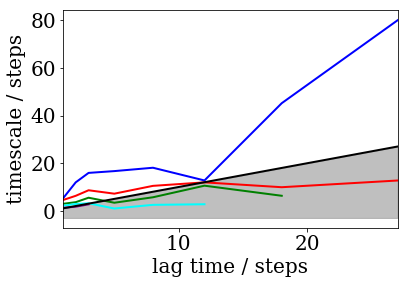

In [48]:
mplt.plot_implied_timescales(its, ylog=False, units='steps', linewidth=2)

In [86]:
# ttrajs: index of thermodynamic states

ttrajs = np.array(range(0,hills.shape[0]))
bias = np.stack((ttrajs, hills.height), axis=1)

In [93]:
tram_obj = tram([ttrajs], [dtrajs[0][:-1]], [bias], 1)

AssertionError: 